In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23')

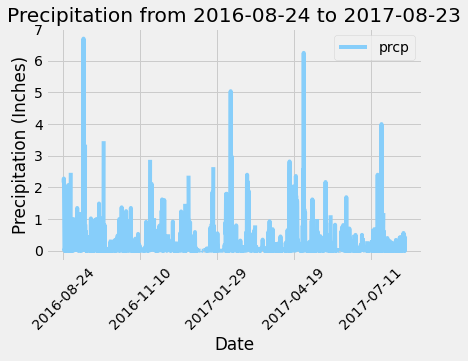

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

year_ago_date = dt.datetime(2016, 8, 23)


# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp = pd.DataFrame(query)
date_prcp.set_index('date', inplace = True)

# Sort the dataframe by date
sorted_df = date_prcp.sort_values("date", ascending=True)
sorted_df

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(title="Precipitation from 2016-08-24 to 2017-08-23", color = "lightskyblue")
plt.legend(loc="best")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Precipitation (Inches)')
plt.savefig("Images/year-precipitation.png")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
most_active = active_stations[0][0]
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active).all()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active).all() 
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active).all()

print(f'Lowest Temperature: {min_temp}')
print(f'Highest Temperature: {max_temp}')
print(f'Average Temperature: {avg_temp}')

Lowest Temperature: [(54.0,)]
Highest Temperature: [(85.0,)]
Average Temperature: [(71.66378066378067,)]


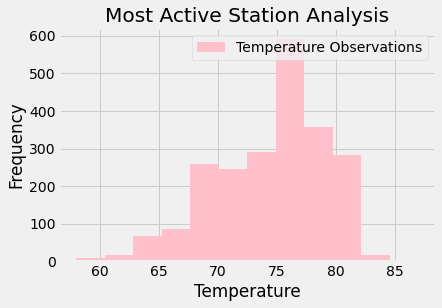

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation_data = session.query(measurement.date, measurement.tobs).filter(measurement.date >= year_ago_date).all()
observation_df = pd.DataFrame(observation_data)
observation_df.set_index('date', inplace = True)

plt.hist(observation_df['tobs'], bins=12, color='pink')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Most Active Station Analysis')
plt.legend(["Temperature Observations"], loc="best")
plt.savefig("Images/temperature_bar_chart.png")
plt.show()

# Close session

In [16]:
# Close Session
session.close()